In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from glob import glob
import os

h_files = sorted(glob(f'{os.getcwd()}/checkpoints/*/history.json'))

In [2]:
hs = []
for hf in h_files:
    with open(hf) as f:
        hs.append(json.load(f))

8: {'dropout': 0.31096846185725785, 'optim': 'adamw'}, epochs: 94
	loss: 0.976, accuracy: 0.729, val_accuracy: 0.885, f1_score: 0.728, val_f1_score: 0.881
9: {'dropout': 0.3680187201216583, 'optim': 'adamw'}, epochs: 118
	loss: 1.089, accuracy: 0.700, val_accuracy: 0.878, f1_score: 0.698, val_f1_score: 0.873
4: {'dropout': 0.40450342882791057, 'optim': 'adamw'}, epochs: 125
	loss: 1.227, accuracy: 0.660, val_accuracy: 0.879, f1_score: 0.658, val_f1_score: 0.874
12: {'dropout': 0.42704953193709455, 'optim': 'adamw'}, epochs: 83
	loss: 2.017, accuracy: 0.482, val_accuracy: 0.822, f1_score: 0.477, val_f1_score: 0.812
1: {'dropout': 0.3907050856575669, 'optim': 'sgd'}, epochs: 66
	loss: 5.079, accuracy: 0.038, val_accuracy: 0.162, f1_score: 0.030, val_f1_score: 0.098
10: {'dropout': 0.4369450505655366, 'optim': 'sgd'}, epochs: 96
	loss: 5.398, accuracy: 0.039, val_accuracy: 0.166, f1_score: 0.028, val_f1_score: 0.106
2: {'dropout': 0.3620743406286583, 'optim': 'sgd'}, epochs: 58
	loss: 5.6

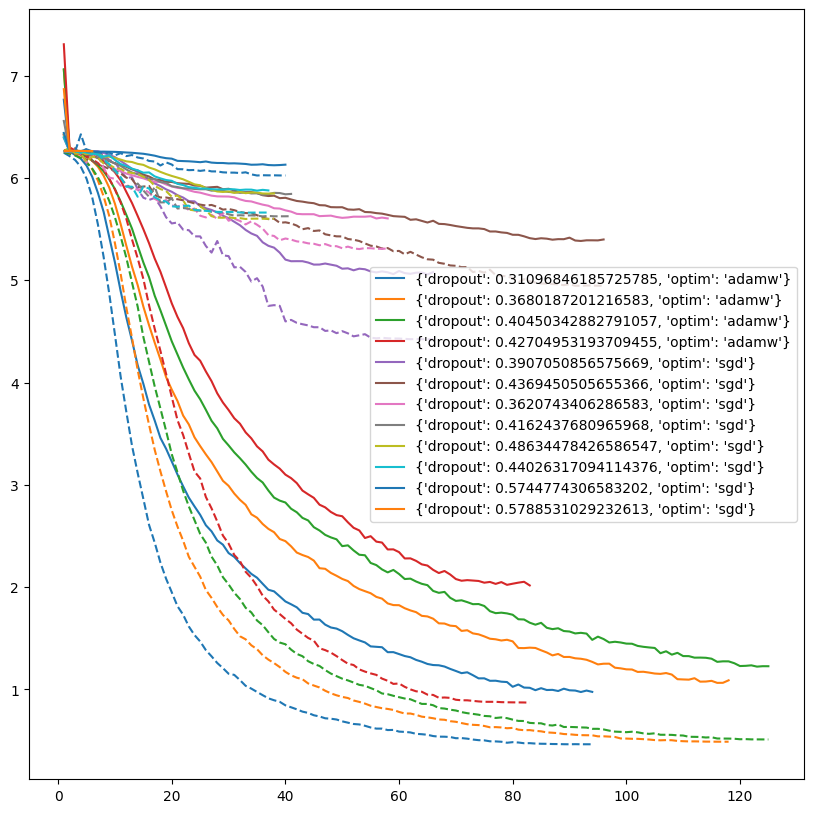

In [3]:
plt.figure(figsize=(10,10))

for i, h in enumerate(sorted(hs, key=lambda h: h['loss'][-1])):
    print(f'{h["iteration"]}: {h["params"]}, epochs: {h["epochs"]}')
    print('\t' + ', '.join(f'{name}: {h[name][-1]:.3f}' for name in ['loss', 'accuracy', 'val_accuracy', 'f1_score', 'val_f1_score']))
    l, = plt.plot(range(1, h['epochs']+1), h['loss'], label=str(h['params']))
    plt.plot(range(1, h['epochs']+1), h['val_loss'], color=l.get_color(), linestyle='--')

plt.legend();

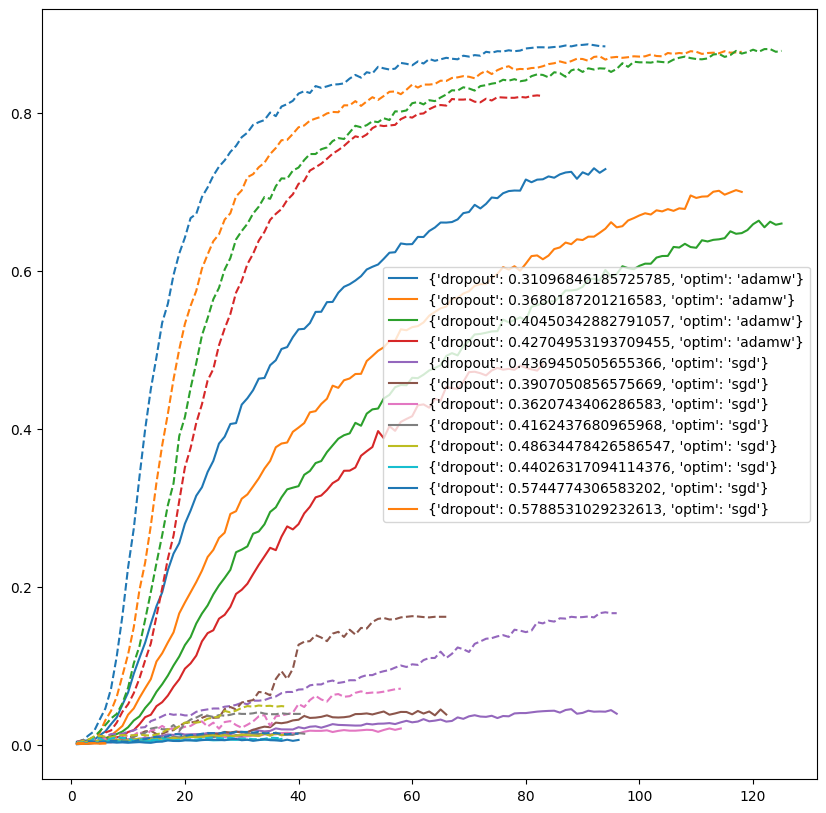

In [4]:
def plot_metric(metric):
    plt.figure(figsize=(10,10))

    for i, h in enumerate(sorted(hs, key=lambda h: -h[metric][-1])):
        l, = plt.plot(range(1, h['epochs']+1), h[metric], label=str(h['params']))
        plt.plot(range(1, h['epochs']+1), h[f'val_{metric}'], color=l.get_color(), linestyle='--')

    plt.legend();

plot_metric('accuracy')

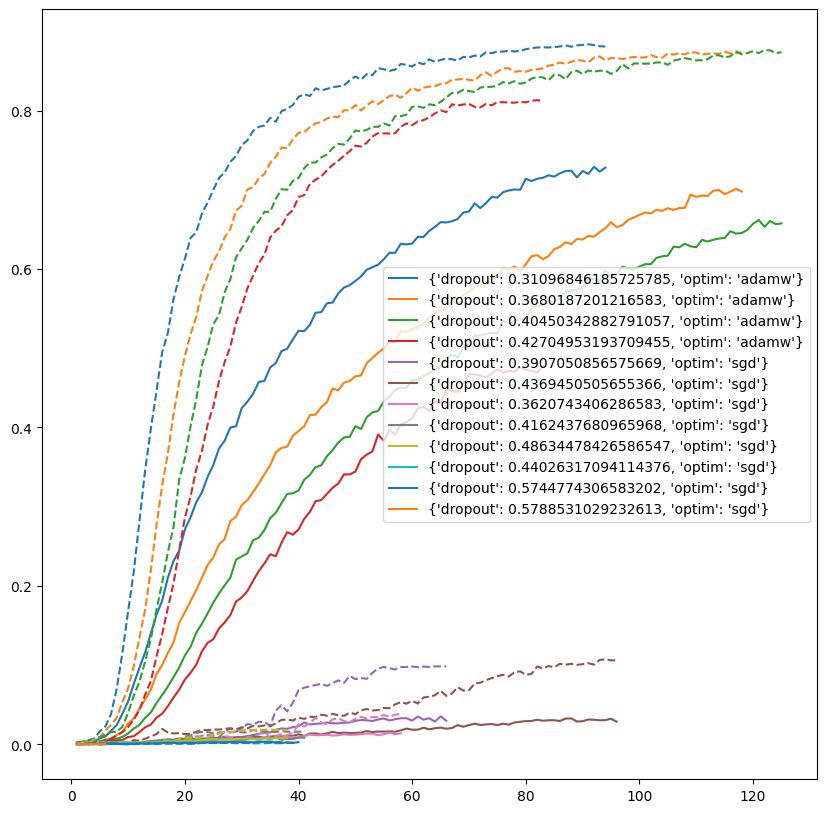

In [5]:
plot_metric('f1_score')